In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [14]:
img_height = 1681
img_width = 1121
batch_size = 16

In [15]:
ds_train_grey = tf.keras.preprocessing.image_dataset_from_directory('/Users/vanidamelanie/Zotero/Marvin/EC',color_mode="grayscale", batch_size = batch_size,
                                                              image_size = (img_height, img_width),seed = 123, validation_split = 0.2, subset = 'training')
ds_validation_grey = tf.keras.preprocessing.image_dataset_from_directory('/Users/vanidamelanie/Zotero/Marvin/EC',color_mode="grayscale", batch_size = batch_size,
                                                              image_size = (img_height, img_width),seed = 123, validation_split = 0.2, subset = 'validation')
#ändern des Pfades nötig

Found 5158 files belonging to 2 classes.
Using 4127 files for training.
Found 5158 files belonging to 2 classes.
Using 1031 files for validation.


['Flooding', 'Regular_State']


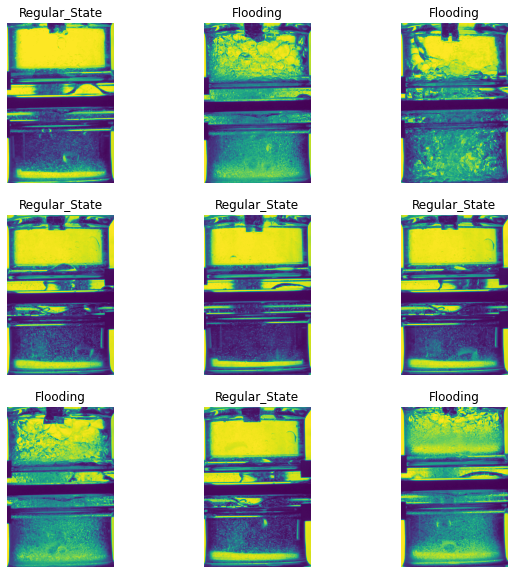

In [4]:
class_names = ds_train_grey.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in ds_train_grey.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
#beispiel Bilder anzeigen lassen. Die Bilder sind theoretisch in 'greyscale'

In [16]:
ds_train_grey.take(1)

<TakeDataset shapes: ((None, 1681, 1121, 1), (None,)), types: (tf.float32, tf.int32)>

In [17]:
for image_batch, labels_batch in ds_train_grey:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(16, 1681, 1121, 1)
(16,)


In [25]:
train_grey = image_batch.numpy()
train_grey.shape
#eigentlich unnötig

(16, 1681, 1121, 1)

In [27]:
num_classes = 2
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.AveragePooling2D(12,6, input_shape = (img_height, img_width, 1)),
  layers.Conv2D(32,6, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Conv2D(16, 6, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  #layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
#beispiel CNN ausm Internet: https://www.tensorflow.org/tutorials/images/classification


In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [29]:
model.summary()


#AUTOTUNE = tf.data.AUTOTUNE
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 1681, 1121, 1)     0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 279, 185, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 279, 185, 32)      1184      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 279, 185, 16)      18448     
_________________________________________________________________
flatten_3 (Flatten)          (None, 825840)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1651682   
Total params: 1,671,314
Trainable params: 1,671,314
Non-trainable params: 0
____________________________________________

In [30]:
epochs=3
history = model.fit(
  ds_train_grey,
  validation_data=ds_validation_grey,
  epochs=epochs
)


Epoch 1/3
258/258 [==============================] - 518s 2s/step - loss: 0.1644 - accuracy: 0.9658 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/3
258/258 [==============================] - 513s 2s/step - loss: 5.0034e-04 - accuracy: 1.0000 - val_loss: 1.4665e-04 - val_accuracy: 1.0000
Epoch 3/3
258/258 [==============================] - 557s 2s/step - loss: 2.5800e-05 - accuracy: 1.0000 - val_loss: 1.3270e-04 - val_accuracy: 1.0000


In [31]:
model.evaluate(ds_validation_grey)

65/65 [==============================] - 26s 380ms/step - loss: 1.3270e-04 - accuracy: 1.0000


[0.0001326963392784819, 1.0]